# Exploratory Data Analysis

## Try to find out weak areas where we can work to make more profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv(r"C:\Users\Vishal\Desktop\Spark internship\Task 3\SampleSuperstore.csv")

In [62]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<Axes: xlabel='Category', ylabel='Count'>

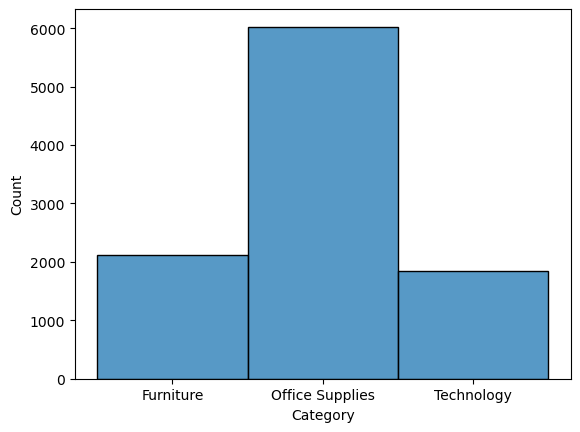

In [68]:
sns.histplot(data.Category)

In [70]:
Categorywise_sales = data.groupby('Category')['Sales'].sum().reset_index()
Categorywise_sales

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


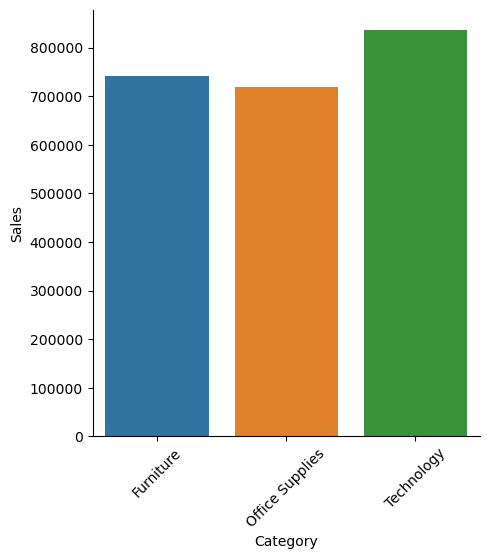

In [71]:
sns.catplot(data= Categorywise_sales, x='Category', y='Sales', kind = 'bar')
plt.xticks(rotation=45)
plt.show()

#### Here we can see that the best selling category is 'Technology Category'.So we have to increase sell other two catogories also.

### Let's analyse the 'Sub-Category' sales.

In [8]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [48]:
sub_cate_sales = data.groupby('Sub-Category')['Sales'].sum().reset_index()
sub_cate_sales

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


#### Top 5 most selling 'sub-categories'

In [49]:
top5_sub_cate_sales = sub_cate_sales.sort_values(by='Sales', ascending=False).head(5)
top5_sub_cate_sales

,Sub-Category,Sales
13,Phones,330007.054
5,Chairs,328449.103
14,Storage,223843.608
16,Tables,206965.532
3,Binders,203412.733


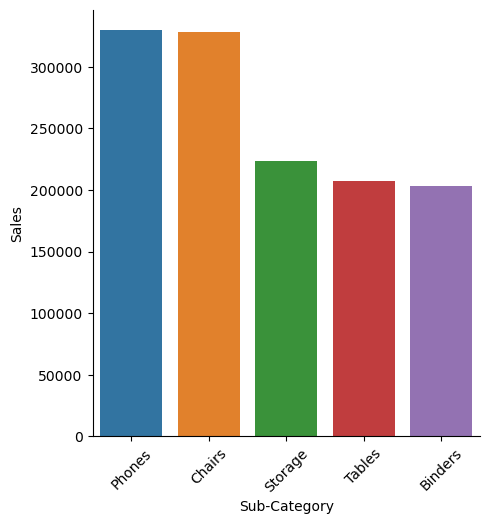

In [50]:
sns.catplot(data= top5_sub_cate_sales, x='Sub-Category', y='Sales', kind = 'bar')
plt.xticks(rotation=45)
plt.show()

#### Top 5 least selling 'sub-categories'

In [57]:
bottom5_sub_cate_sales = sub_cate_sales.sort_values(by='Sales').head(5)
bottom5_sub_cate_sales

,Sub-Category,Sales
8,Fasteners,3024.280
10,Labels,12486.312
7,Envelopes,16476.402
2,Art,27118.792
15,Supplies,46673.538


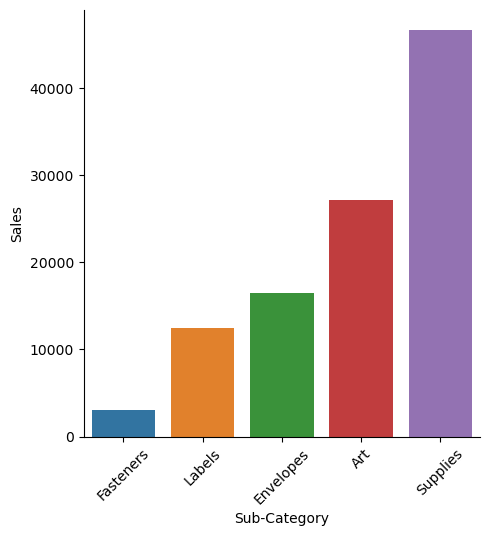

In [58]:
sns.catplot(data= bottom5_sub_cate_sales, x='Sub-Category', y='Sales', kind = 'bar')
plt.xticks(rotation=45)
plt.show()

#### Here we can see in Sub-Category 'Phone' and 'Chair' is the most selling category and 'Fasteners' and 'Labels' is the least selling categories, so we can focus on least selling categories for increasing the selling and gain more profit. 

## Region Wise Analyse

In [65]:
Region_wise_sales = data.groupby('Region')['Sales'].sum().reset_index()
Region_wise_sales

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


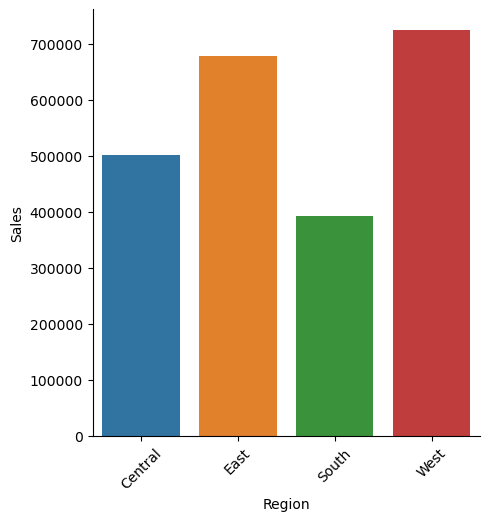

In [66]:
sns.catplot(data= Region_wise_sales, x='Region', y='Sales', kind = 'bar')
plt.xticks(rotation=45)
plt.show()

#### This indicates that the west region has the most sales and South region has the fewest Sales, entries, or observations in the dataset. We have to work on there to increase the Sales.

In [72]:
Regionwise_profit = data.groupby('Region')['Profit'].sum().reset_index()
Regionwise_profit

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


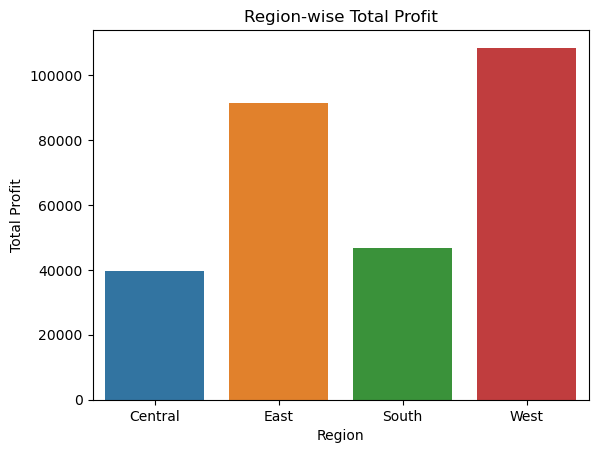

In [73]:
sns.barplot(data=Regionwise_profit, x='Region', y='Profit')
plt.title('Region-wise Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

#### The Central region has the lowest profit with $39,706.36, indicating it may be underperforming compared to other regions.After implementing some action plan, we can improve the profitability of 'Central Region' also.

## State Wise Analyse

In [79]:
Statewise_sales = data.groupby('State')['Sales'].sum().reset_index()
Statewise_sales

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


In [82]:
top5_state = Statewise_sales.sort_values(by='Sales', ascending=False ).head(5)
top5_state

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140


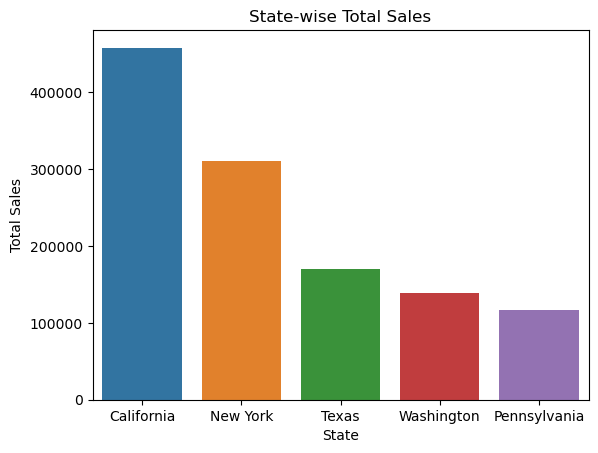

In [89]:
sns.barplot(data=top5_state, x='State', y='Sales')
plt.title('State-wise Total Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

In [83]:
bottom5_state = Statewise_sales.sort_values(by='Sales').head(5)
bottom5_state

,State,Sales
32,North Dakota,919.910
46,West Virginia,1209.824
17,Maine,1270.530
39,South Dakota,1315.560
48,Wyoming,1603.136


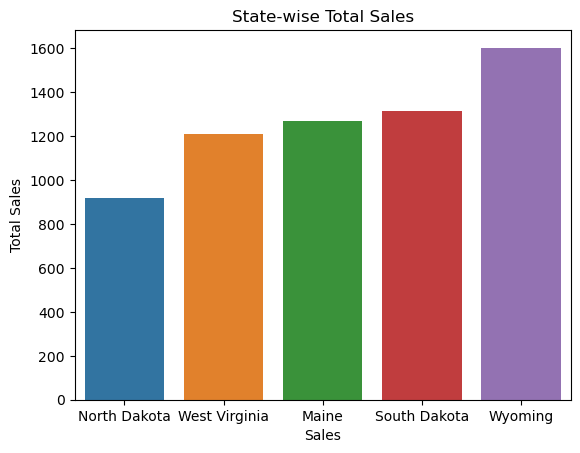

In [90]:
sns.barplot(data=bottom5_state, x='State', y='Sales')
plt.title('State-wise Total Sales')
plt.xlabel('Sales')
plt.ylabel('Total Sales')
plt.show()

#### The 'California' state has most sales with 457687.6315USD and 'North Dakota' has the lowest sales with 919.910 USD,which is indicating it may be underperforming compared to other regions.After implementing some action plan, we can improve the Sales of 'North Dakota' also.

In [92]:
Statewise_profit = data.groupby('State')['Profit'].sum().reset_index()
Statewise_profit

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


In [94]:
top5_state_profit = Statewise_profit.sort_values(by='Profit', ascending=False ).head(5)
top5_state_profit

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504


In [96]:
bottom5_state_profit = Statewise_profit.sort_values(by='Profit' ).head(5)
bottom5_state_profit

,State,Profit
41,Texas,-25729.3563
33,Ohio,-16971.3766
36,Pennsylvania,-15559.9603
11,Illinois,-12607.8870
31,North Carolina,-7490.9122


#### The 'California' state has most Profitable state with 76381.387 USD and 'Texas' has the Most Loss with -25729.3563 USD,which is indicating it may be underperforming compared to other State.After implementing some action plan, we can improve the Profitability of 'Taxas' also.

In [105]:
d = data.groupby('State')['Discount'].sum().reset_index()
d

,State,Discount
0,Alabama,0.00
1,Arizona,68.00
2,Arkansas,0.00
3,California,145.60
4,Colorado,57.60
5,Connecticut,0.60
6,Delaware,0.60
7,District of Columbia,0.00
8,Florida,114.65
9,Georgia,0.00


In [106]:
d.sort_values(by='Discount', ascending=False).head(5)

,State,Discount
41,Texas,364.64
36,Pennsylvania,192.90
11,Illinois,191.90
33,Ohio,152.40
3,California,145.60


In [107]:
d.sort_values(by='Discount').head(5)

,State,Discount
0,Alabama,0.0
23,Missouri,0.0
17,Maine,0.0
16,Louisiana,0.0
15,Kentucky,0.0


### After applying the discount of 364.64 to transactions in Texas city, the total profit turns out to be a loss of -25,729.36 USD This indicates that despite offering the discount, the expenses and/or other costs associated with the transactions in Texas city exceeded the revenue generated from sales, resulting in a significant loss.